# 5.1Test covnets
## Load data 

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical

# Load.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape images.
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
test_images = test_images.astype('float32')/255

# Convert labels to categorical.
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Split validation and train.
# TODO

Using TensorFlow backend.


In [14]:
result_labels= model.predict(test_images)

 This is number[1]


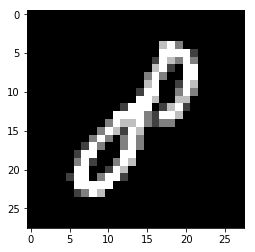

In [30]:
import matplotlib.pyplot as plt
import numpy as np
index = np.random.randint(0,test_images.shape[0])
print(f" This is number{np.nonzero(result_labels[index]>0.5)[0]}")
plt.imshow(test_images[index].reshape((28,28)),plt.cm.gray)




 This is number[5]


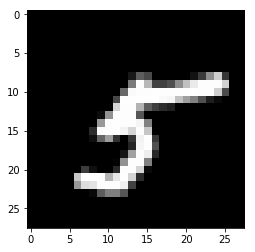

In [13]:
import matplotlib.pyplot as plt
import numpy as np
index = np.random.randint(0,train_images.shape[0])
print(f" This is number{np.nonzero(train_labels[index])[0]}")
plt.imshow(train_images[index].reshape((28,28)),plt.cm.gray)

## Create model
Convolutional networks recieve inputs of shape \[height, width, channels\]. When creating a layer the first parameter is the number of output channels. while the second is the shape of the convolutional window.

Max polling shrinks the input layer by applying max over it's window size.

After convolutional layer which will extract features from the image we should use a classifier made from stacks of dense layers.

In [2]:
from keras import layers
from keras import models

# NOTE: input is a 4D tensor: batch, height, width, channels.
model = models.Sequential()
# ConvNet part of the model. 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Classifier part.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile.
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the summary of the model.
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dens

In [3]:
# Train.
model.fit(train_images, train_labels, epochs=5, batch_size=64)
test_loss, test_acc = model.evaluate(test_images,test_labels)
print(f"Test [loss, accuracy]:[{test_loss:.6f}, {test_acc * 100:.2f} %]")

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 44s 726us/step - loss: 0.1782 - acc: 0.9428
Epoch 2/5
60000/60000 [==============================] - 42s 692us/step - loss: 0.0493 - acc: 0.9850
Epoch 3/5
60000/60000 [==============================] - 43s 719us/step - loss: 0.0329 - acc: 0.9894
Epoch 4/5
60000/60000 [==============================] - 42s 703us/step - loss: 0.0246 - acc: 0.9921
Epoch 5/5
10000/10000 [==============================] - 3s 260us/step
Test [loss, accuracy]:[0.027935, 99.10 %]
